In [22]:
from astropy.wcs import WCS
from astropy.io import fits
from reproject import reproject_interp
import cmasher as cmr
from scipy import signal
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import colors
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [10]:
!jt -l
!jt -t 

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [98]:
### 
mosaic_path = '/Users/hph/Dropbox/astrophys/CMZoom/cmzoom_RGB/cmzoom_rgb_custom/'
cmzoom_path = '/Users/hph/Dropbox/astrophys/CMZoom/cmzoom_catalog/catalog_acc/'
cmzoom_leaf_mask = fits.open(cmzoom_path+'dendrogram_mask_pruned_rms3e6_k14_dv3_dd1_dp17_pp6_pm2_gal_02-02-20.fits')
mosaic_8um  = fits.open(mosaic_path+'gcmosaic_8um.fits')
mosaic_24um = fits.open(mosaic_path+'24micron_gal.fits')
mosaic_70um = fits.open(mosaic_path+'gcmosaic_70um.fits')

mosaic_25um = fits.open(mosaic_path+'F0588_FO_IMA_07018936_FORF253_MOS_0001-0348.fits')
mosaic_25um[0].data = mosaic_25um[0].data[0,:,:]
mosaic_25um[0].header['NAXIS']=2
#mosaic_25um[0].header.remove('NAXIS3')

mosaic_37um = fits.open(mosaic_path+'F0588_FO_IMA_07018936_FORF371_MOS_0001-0348.fits')
mosaic_37um[0].data = mosaic_37um[0].data[0,:,:]
mosaic_37um[0].header['NAXIS']=2
#mosaic_37um[0].header.remove('NAXIS3')


In [99]:
mosaic_70um[0].header

SIMPLE  =                    T / Written by IDL:  Sat Jul 23 22:32:49 2011      
BITPIX  =                  -32 / Real*4 (floating point)                        
NAXIS   =                    2                                                  
NAXIS1  =                 8000                                                  
NAXIS2  =                 3000                                                  
EXTEND  =                    T                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
CTYPE1  = 'GLON-TAN'                                                            
CTYPE2  = 'GLAT-TAN'                                                            
CRPIX1  =                4000.                                                  
CRPIX2  =                1500.                                                  
CRVAL1  =                  0

In [100]:
wcs = WCS(cmzoom_leaf_mask[0].header)
### convolve images to worst resolution
mosaic_8um[0].header['CDELT1']*3600
beam_70um = 6 ## in arcsec


# kernel = np.outer(signal.windows.gaussian(40, 2),
#                   signal.windows.gaussian(40, 2))
kernel = np.outer(signal.windows.gaussian(40,2),
                  signal.windows.gaussian(40, 2))

In [101]:

array, footprint = reproject_interp(mosaic_8um, cmzoom_leaf_mask[0].header)
mosaic_8_conv = convolve_fft(array,kernel=kernel)
fits.writeto(mosaic_path+'mosaic_8um_reprojected.fits', mosaic_8_conv, wcs.to_header(), overwrite=True)



In [102]:

array, footprint = reproject_interp(mosaic_24um, cmzoom_leaf_mask[0].header)
mosaic_24_conv = convolve_fft(array,kernel=kernel)
fits.writeto(mosaic_path+'mosaic_24um_reprojected.fits', mosaic_24_conv, wcs.to_header(), overwrite=True)


In [103]:

array, footprint = reproject_interp(mosaic_70um, cmzoom_leaf_mask[0].header)
#mosaic_70_conv = convolve_fft(array_8um,kernel=kernel)
fits.writeto(mosaic_path+'mosaic_70um_reprojected.fits', array, wcs.to_header(), overwrite=True)


In [104]:

array, footprint = reproject_interp(mosaic_25um, cmzoom_leaf_mask[0].header)
mosaic_25_conv = convolve_fft(array,kernel=kernel)
fits.writeto(mosaic_path+'mosaic_25um_reprojected.fits', mosaic_25_conv, wcs.to_header(), overwrite=True)



In [105]:

array, footprint = reproject_interp(mosaic_37um, cmzoom_leaf_mask[0].header)
mosaic_37_conv = convolve_fft(array,kernel=kernel)
fits.writeto(mosaic_path+'mosaic_37um_reprojected.fits', mosaic_37_conv, wcs.to_header(), overwrite=True)


In [57]:
mosaic_70um[0].header['CDELT1']*-3600.

3.2000000000004

In [59]:
### convolve images to worst resolution
mosaic_8um[0].header['CDELT1']*3600
beam_70um = 6 ## in arcsec


# kernel = np.outer(signal.windows.gaussian(40, 2),
#                   signal.windows.gaussian(40, 2))
kernel = np.outer(signal.windows.gaussian(40,2),
                  signal.windows.gaussian(40, 2))

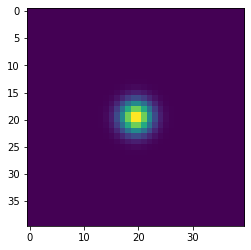

In [60]:
plt.imshow(kernel)


In [61]:
array_8um, footprint_8um = reproject_interp(mosaic_8um, cmzoom_leaf_mask[0].header)
array_70um, footprint_70um = reproject_interp(mosaic_70um, cmzoom_leaf_mask[0].header)

#fits.writeto(mosaic_path+'mosaic_8um_reprojected.fits', array, wcs.to_header(), overwrite=True)

In [62]:
from astropy.convolution import convolve_fft

#mosaic_8_conv = signal.fftconvolve(array, kernel,mode='same')
mosaic_8_conv = convolve_fft(array_8um,kernel=kernel)
mosaic_70_conv = convolve_fft(array_70um,kernel=kernel)


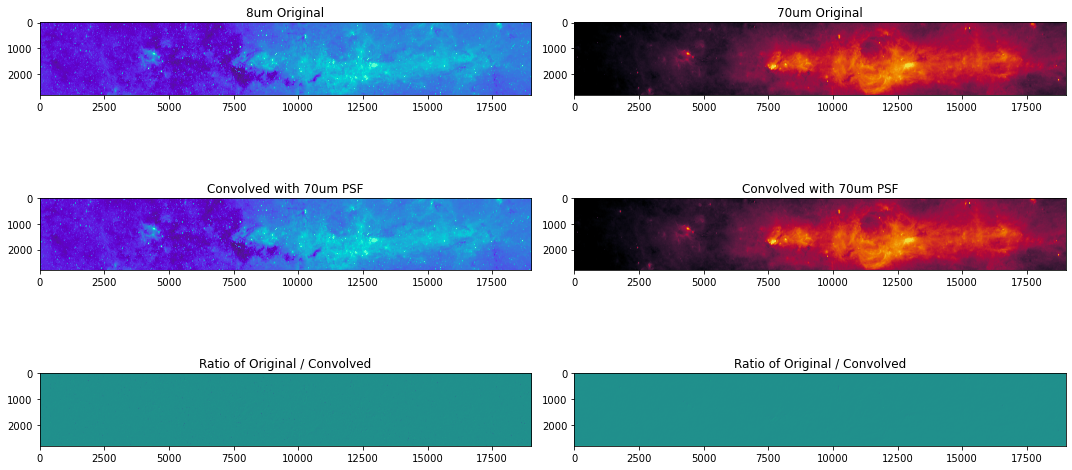

In [66]:
fig, ax = plt.subplots(nrows=3,ncols=2,figsize=(15,8))
norm = colors.LogNorm(vmin=10, vmax=1e3)
ax[0,0].imshow(array_8um, cmap=cmr.cosmic,norm=norm)
ax[0,0].set_title('8um Original')
#ax[0,0].set_xlim(10000,12000)
#ax[0,0].set_ylim(2000,1000)

ax[1,0].imshow(mosaic_8_conv, cmap=cmr.cosmic,norm=norm)
ax[1,0].set_title('Convolved with 70um PSF')
#ax[1,0].set_xlim(10000,12000)
#ax[1,0].set_ylim(2000,1000)

ax[2,0].imshow((array_8um/mosaic_8_conv), cmap='viridis', norm=colors.LogNorm(vmin=0.5, vmax=2))
ax[2,0].set_title('Ratio of Original / Convolved')
#ax[2,0].set_xlim(10000,12000)
#ax[2,0].set_ylim(2000,1000)

norm = colors.LogNorm(vmin=1e3, vmax=1e5)
ax[0,1].imshow(array_70um, cmap=cmr.ember,norm=norm)
ax[0,1].set_title('70um Original')
#ax[0,1].set_xlim(10000,12000)
#ax[0,1].set_ylim(2000,1000)

ax[1,1].imshow(mosaic_70_conv, cmap=cmr.ember,norm=norm)
ax[1,1].set_title('Convolved with 70um PSF')
#ax[1,1].set_xlim(10000,12000)
#ax[1,1].set_ylim(2000,1000)

ax[2,1].imshow((array_70um/mosaic_70_conv), cmap='viridis', norm=colors.LogNorm(vmin=0.5, vmax=2))
ax[2,1].set_title('Ratio of Original / Convolved')
#ax[2,1].set_xlim(10000,12000)
#ax[2,1].set_ylim(2000,1000)

plt.tight_layout()

In [75]:
leaf_23935_8um = mosaic_8_conv[np.where(cmzoom_leaf_mask[0].data==23935)]
print(len(np.where(cmzoom_leaf_mask[0].data==23935)[0]))

253


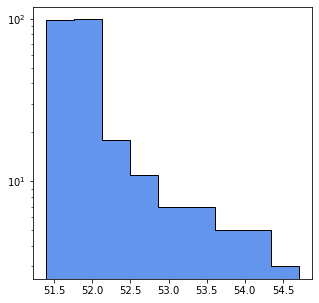

In [84]:
fig, ax = plt.subplots(figsize=(5,5))
#bins = np.logspace(np.log10(np.min(leaf_23935_8um)),np.log10(np.max(leaf_23935_8um)),10)
bins = np.linspace(np.min(leaf_23935_8um),np.max(leaf_23935_8um),10)
ax.hist(leaf_23935_8um.flatten(),log=True,histtype='step',bins=bins,color='k')
ax.hist(leaf_23935_8um.flatten(),log=True,bins=bins,color='cornflowerblue')
#ax.set_xscale('log')
ax.set_yscale('log')


<IPython.core.display.Javascript object>


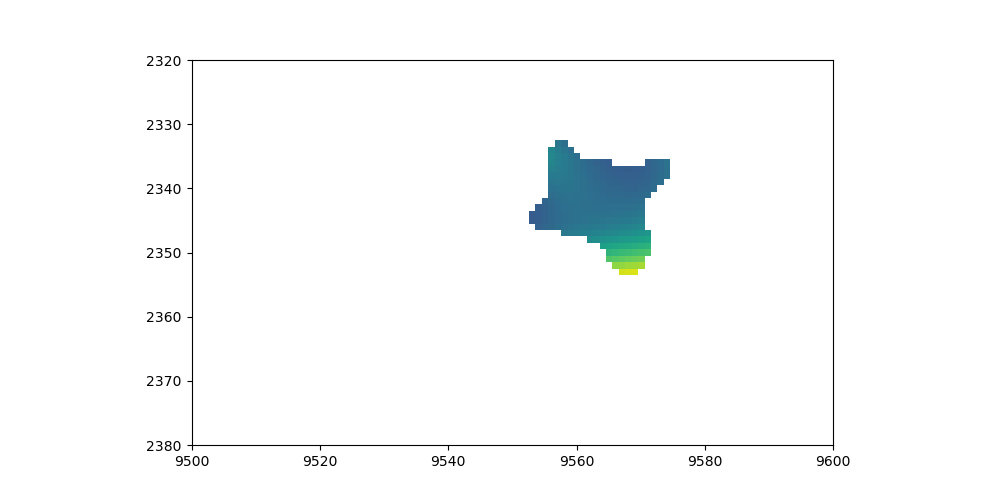

(2380.0, 2320.0)

In [97]:
### show just the leaf
%matplotlib notebook
leaf_only = np.zeros_like(mosaic_8_conv)
leaf_only[np.where(cmzoom_leaf_mask[0].data==23935)] = mosaic_8_conv[np.where(cmzoom_leaf_mask[0].data==23935)]
fig, ax = plt.subplots(figsize=(10,5))
norm = colors.LogNorm(vmin=50, vmax=55)
ax.imshow(leaf_only,norm=norm)
ax.set_xlim(9500,9600)
ax.set_ylim(2380,2320)

In [106]:
leaf_only[np.where(leaf_only==0)]
leaf_23935_8um = mosaic_8_conv[np.where(cmzoom_leaf_mask[0].data==23935)]
leaf_23935_24um = mosaic_24_conv[np.where(cmzoom_leaf_mask[0].data==23935)]
leaf_23935_70um = mosaic_70_conv[np.where(cmzoom_leaf_mask[0].data==23935)]
leaf_23935_25um = mosaic_25_conv[np.where(cmzoom_leaf_mask[0].data==23935)]
leaf_23935_37um = mosaic_37_conv[np.where(cmzoom_leaf_mask[0].data==23935)]
print(len(np.where(cmzoom_leaf_mask[0].data==23935)[0]))

253


<IPython.core.display.Javascript object>


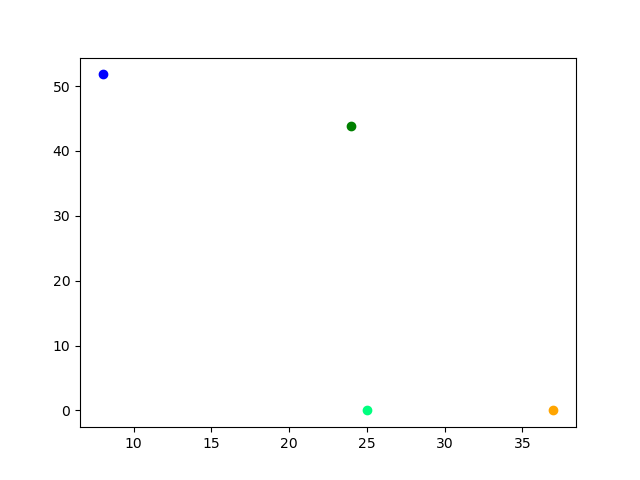

In [121]:
fig, ax = plt.subplots()
ax.scatter([8],[np.median(leaf_23935_8um)],color='blue',marker='o')
ax.scatter([24],[np.median(leaf_23935_24um)],color='green',marker='o')
#ax.scatter([70],[np.mean(leaf_23935_70um)],color='red',marker='o')
ax.scatter([25],[np.median(leaf_23935_25um)],color='springgreen',marker='o')
ax.scatter([37],[np.median(leaf_23935_37um)],color='orange',marker='o')



In [124]:
print(mosaic_25um[0].header['BUNIT'],mosaic_25um[0].header['CDELT1'])
print(mosaic_25um[0].header['CDELT1']*2*np.pi/360.)
print(np.median(leaf_23935_25um)*(mosaic_25um[0].header['CDELT1']*2*np.pi/360.)**2)


Jy -0.000213333335188
-3.7233691032912765e-06
0.0


In [119]:
mosaic_8um[0].header['BUNIT']

'MJy/sr'

In [123]:
np.median(leaf_23935_25um)

0.0